In [1]:
import pandas as pd
from vega_datasets import data

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,temp,date,year,month,day,weekday
0,47.8,2010-01-01 00:00:00,2010,1,1,Friday
1,47.4,2010-01-01 01:00:00,2010,1,1,Friday
2,46.9,2010-01-01 02:00:00,2010,1,1,Friday
3,46.5,2010-01-01 03:00:00,2010,1,1,Friday
4,46.0,2010-01-01 04:00:00,2010,1,1,Friday


In [5]:
df = df.set_index('date').sort_index()
df

,temp,year,month,day,weekday
date,,,,,
2010-01-01 00:00:00,47.8,2010,1,1,Friday
2010-01-01 01:00:00,47.4,2010,1,1,Friday
2010-01-01 02:00:00,46.9,2010,1,1,Friday
2010-01-01 03:00:00,46.5,2010,1,1,Friday
2010-01-01 04:00:00,46.0,2010,1,1,Friday
...,...,...,...,...,...
2010-12-31 19:00:00,50.4,2010,12,31,Friday
2010-12-31 20:00:00,49.9,2010,12,31,Friday
2010-12-31 21:00:00,49.4,2010,12,31,Friday


<AxesSubplot:xlabel='date'>

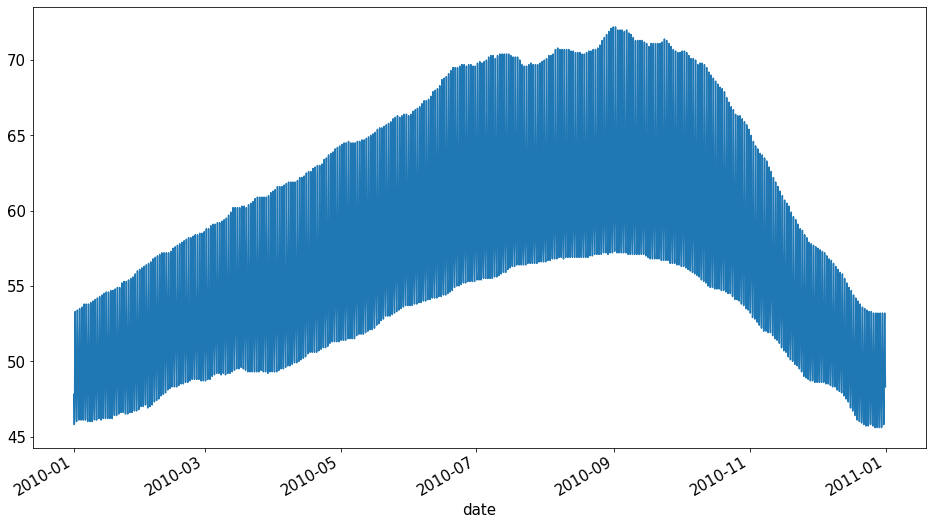

In [6]:
df.temp.plot()

# Temps data set

1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [7]:
by_day = df.resample('D').temp.mean()
by_day.head()

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
Freq: D, Name: temp, dtype: float64

<AxesSubplot:xlabel='date'>

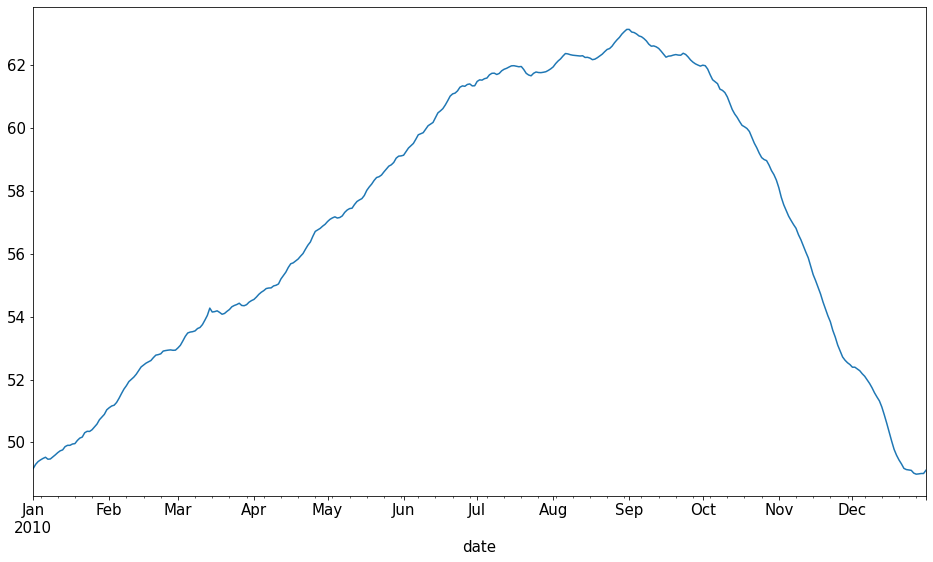

In [8]:
by_day.plot()

2. Write the code necessary to visualize the minimum temperature over time.


In [9]:
min_day = df.resample('D').temp.min()
min_day.head()


date
2010-01-01    45.8
2010-01-02    46.0
2010-01-03    46.1
2010-01-04    46.1
2010-01-05    46.1
Freq: D, Name: temp, dtype: float64

<AxesSubplot:xlabel='date'>

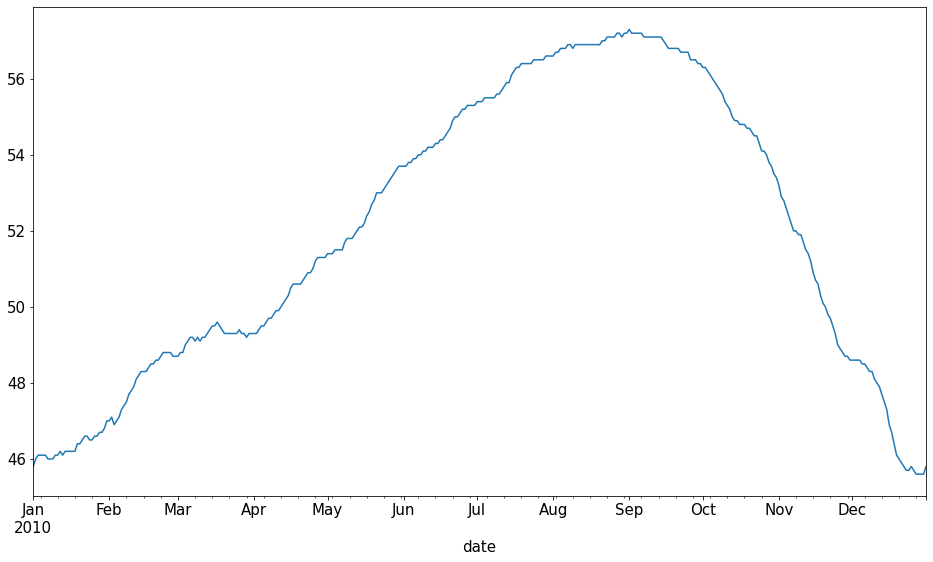

In [10]:
min_day.plot()

3. Write the code necessary to visualize the maximum temperature over time.


In [11]:
max_day = df.resample('D').temp.max()
max_day.head()


date
2010-01-01    53.3
2010-01-02    53.4
2010-01-03    53.5
2010-01-04    53.6
2010-01-05    53.8
Freq: D, Name: temp, dtype: float64

<AxesSubplot:xlabel='date'>

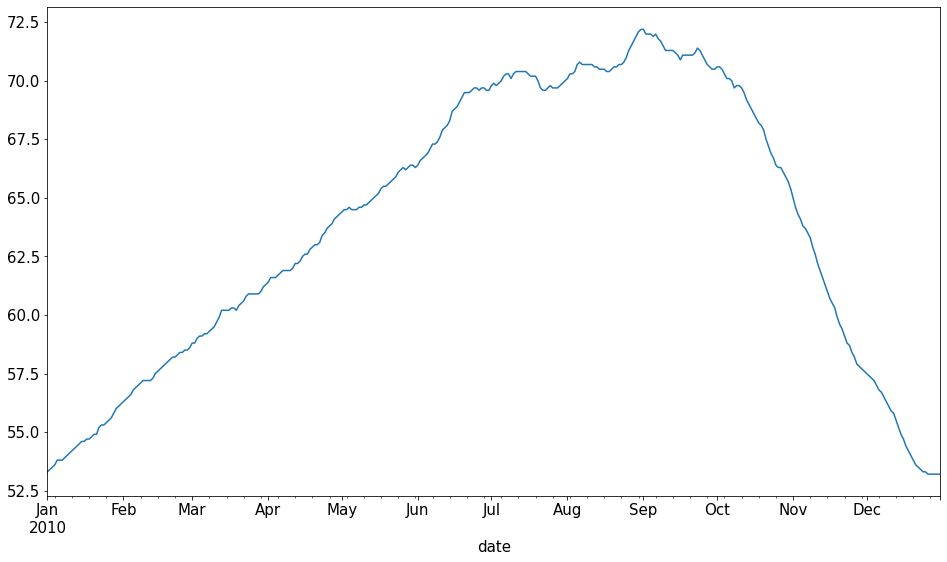

In [12]:
max_day.plot()

4. Which month is the coldest, on average?


In [13]:
by_month_min = df.resample('M').temp.mean().idxmin()
by_month_min

Timestamp('2010-01-31 00:00:00', freq='M')

In [14]:
df.resample('M').temp.mean().min()

49.98413978494623

5. Which month has the highest average temperature?


In [15]:
by_month_max = df.resample('M').temp.mean().idxmax()
by_month_max

Timestamp('2010-09-30 00:00:00', freq='M')

In [16]:
df.resample('M').temp.mean().max()

62.48708333333333

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [17]:
df_new = df.resample('D').temp.agg(['max','min'])
df_new.head()

,max,min
date,,
2010-01-01,53.3,45.8
2010-01-02,53.4,46.0
2010-01-03,53.5,46.1
2010-01-04,53.6,46.1
2010-01-05,53.8,46.1


In [18]:
df.head()

,temp,year,month,day,weekday
date,,,,,
2010-01-01 00:00:00,47.8,2010,1,1,Friday
2010-01-01 01:00:00,47.4,2010,1,1,Friday
2010-01-01 02:00:00,46.9,2010,1,1,Friday
2010-01-01 03:00:00,46.5,2010,1,1,Friday
2010-01-01 04:00:00,46.0,2010,1,1,Friday


In [19]:
df_new['change_in_temp'] = df_new['max']- df_new['min']

In [20]:
df_new.head()

,max,min,change_in_temp
date,,,
2010-01-01,53.3,45.8,7.5
2010-01-02,53.4,46.0,7.4
2010-01-03,53.5,46.1,7.4
2010-01-04,53.6,46.1,7.5
2010-01-05,53.8,46.1,7.7


In [22]:
df_new.resample('M').change_in_temp.mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: change_in_temp, dtype: float64

# Seattle

### How do we make pandas time aware so we can utilize the built in functionality for time series analysis?

#### 3 steps

* Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
* Set the datetime column as Index
* Sort the datetime index

### Convert to datetime

In [ ]:
df=data.seattle_weather()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.set_index('date').sort_index()
df

In [ ]:
df.plot()

Which year and month combination has the highest amount of precipitation?


In [ ]:
df

Visualize the amount of monthly precipitation over time.


Visualize the amount of wind over time. Choose a time interval you think is appropriate.


Which year-month combination is the windiest?
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
In which month does it rain the most?
Which month has the most number of days with a non-zero amount of precipitation?

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In which month does it rain the most?

Which month has the most number of days with a non-zero amount of precipitation?

In [ ]:
seattle_df.set_index('date', inplace=True)
seattle_df.head()

In [ ]:
seattle_df()